In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time
import glob
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [6]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb


In [4]:
# function to download all listings data
def get_listings_amsterdam_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('Amsterdam')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data4',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data4/raw-data/Amsterdam_{date}.csv',index=False)
get_listings_amsterdam_timeseries()

NameError: name 'bs' is not defined

In [7]:
# pull in detailed_listings
raw_df_amsterdam = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/amsterdam_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_amsterdam)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(amsterdam_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 5402 AirBnb listings.


In [8]:
amsterdam_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/Amsterdam_2020-12.csv')
amsterdam_raw_df_12_12_2020.shape


(18522, 16)

In [9]:
# use magic commands 'cd' to change directory
# use glob to locate all files for amsterdam
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_amsterdam = glob.glob('amsterdam/**.csv')
files_amsterdam

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['amsterdam/Amsterdam_2021-07.csv',
 'amsterdam/Amsterdam_2021-06.csv',
 'amsterdam/Amsterdam_2021-04.csv',
 'amsterdam/Amsterdam_2021-10.csv',
 'amsterdam/Amsterdam_2021-11.csv',
 'amsterdam/Amsterdam_2021-05.csv',
 'amsterdam/Amsterdam_2021-01.csv',
 'amsterdam/Amsterdam_2021-02.csv',
 'amsterdam/Amsterdam_2021-03.csv',
 'amsterdam/Amsterdam_2020-12.csv',
 'amsterdam/Amsterdam_2021-08.csv',
 'amsterdam/Amsterdam_2021-09.csv']

In [10]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

amsterdam_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/Amsterdam_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(amsterdam_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_12_12_2020['price'].mean(),2)}.")

amsterdam_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/Amsterdam_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(amsterdam_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_1_9_2021['price'].mean(),2)}.")

amsterdam_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/Amsterdam_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(amsterdam_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_2_8_2021['price'].mean(),2)}.")

amsterdam_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/Amsterdam_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(amsterdam_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_3_4_2021['price'].mean(),2)}.")

amsterdam_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/Amsterdam_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(amsterdam_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_4_9_2021['price'].mean(),2)}.")

amsterdam_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/Amsterdam_2021-05.csv')
print(f"The 5_19_2021 dataset contains {len(amsterdam_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_5_19_2021['price'].mean(),2)}.")

amsterdam_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/Amsterdam_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(amsterdam_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_6_3_2021['price'].mean(),2)}.")

amsterdam_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/Amsterdam_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(amsterdam_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_7_4_2021['price'].mean(),2)}.")

amsterdam_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/Amsterdam_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(amsterdam_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_8_6_2021['price'].mean(),2)}.")

amsterdam_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/Amsterdam_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(amsterdam_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_9_7_2021['price'].mean(),2)}.")

amsterdam_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/Amsterdam_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(amsterdam_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_10_6_2021['price'].mean(),2)}.")

amsterdam_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/Amsterdam_2021-11.csv')
print(f"The 11_4_2021 dataset contains {len(amsterdam_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(amsterdam_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 18522 AirBnb listings; the avg price is €154.0.
The 1_9_2021 dataset contains 18395 AirBnb listings; the avg price is €152.58.
The 2_8_2021 dataset contains 18291 AirBnb listings; the avg price is €153.06.
The 3_4_2021 dataset contains 18201 AirBnb listings; the avg price is €153.72.
The 4_9_2021 dataset contains 17825 AirBnb listings; the avg price is €154.5.
The 5_19_2021 dataset contains 17031 AirBnb listings; the avg price is €153.73.
The 6_3_2021 dataset contains 16973 AirBnb listings; the avg price is €154.17.
The 7_4_2021 dataset contains 16724 AirBnb listings; the avg price is €156.16.
The 8_6_2021 dataset contains 16478 AirBnb listings; the avg price is €156.87.
The 9_7_2021 dataset contains 16116 AirBnb listings; the avg price is €156.91.
The 10_6_2021 dataset contains 5389 AirBnb listings; the avg price is €166.99.
The 11_4_2021 dataset contains 5402 AirBnb listings; the avg price is €169.0.


In [11]:
df_list_amsterdam = [amsterdam_raw_df_12_12_2020, amsterdam_raw_df_1_9_2021, amsterdam_raw_df_2_8_2021,
           amsterdam_raw_df_3_4_2021, amsterdam_raw_df_4_9_2021, amsterdam_raw_df_5_19_2021, amsterdam_raw_df_6_3_2021, amsterdam_raw_df_7_4_2021,
           amsterdam_raw_df_8_6_2021, amsterdam_raw_df_9_7_2021, amsterdam_raw_df_10_6_2021, amsterdam_raw_df_11_4_2021]

dates_amsterdam = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021', '05_19_2021'
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_amsterdam = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10', '2021-11']


df_final_amsterdam = []

def airbnb_parse_amsterdam(df_list, files):
    for file in files_amsterdam:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/Amsterdam/Amsterdam_{file}.csv")
        print(f"The {file} Amsterdam dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_amsterdam(df_list, dates):
    for file in files_amsterdam:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/Amsterdam/Amsterdam_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_amsterdam.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_amsterdam)

amsterdam_parse = airbnb_parse_amsterdam(df_list_amsterdam, files_amsterdam)


The 2020-12 Amsterdam dataset contains 18522 AirBnb listings -- the avg price is €154.0.
The 2021-01 Amsterdam dataset contains 18395 AirBnb listings -- the avg price is €152.58.
The 2021-02 Amsterdam dataset contains 18291 AirBnb listings -- the avg price is €153.06.
The 2021-03 Amsterdam dataset contains 18201 AirBnb listings -- the avg price is €153.72.
The 2021-04 Amsterdam dataset contains 17825 AirBnb listings -- the avg price is €154.5.
The 2021-05 Amsterdam dataset contains 17031 AirBnb listings -- the avg price is €153.73.
The 2021-06 Amsterdam dataset contains 16973 AirBnb listings -- the avg price is €154.17.
The 2021-07 Amsterdam dataset contains 16724 AirBnb listings -- the avg price is €156.16.
The 2021-08 Amsterdam dataset contains 16478 AirBnb listings -- the avg price is €156.87.
The 2021-09 Amsterdam dataset contains 16116 AirBnb listings -- the avg price is €156.91.
The 2021-10 Amsterdam dataset contains 5389 AirBnb listings -- the avg price is €166.99.
The 2021-11 A

In [12]:
amsterdam_summary = airbnb_to_frame_amsterdam(df_list_amsterdam, files_amsterdam)
amsterdam_summary['Date of scrape'] = pd.to_datetime(amsterdam_summary['Date of scrape'])
amsterdam_summary['City'] = 'Amsterdam'

dfi.export(amsterdam_summary,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/airbnb_amsterdam_summary.png")


In [13]:
master_df_amsterdam = pd.concat(df_list_amsterdam)
master_df_amsterdam_unique = master_df_amsterdam.drop_duplicates(subset='id')
master_df_amsterdam_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,2020-02-14,1.95,1,123,NaN,NaN
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,236,1,339,2020-04-09,2.58,2,3,NaN,NaN
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,2020-02-09,0.14,1,33,NaN,NaN
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,135,2,219,2020-07-25,2.01,1,219,NaN,NaN
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-Oost,52.36610,4.88953,Private room,75,2,336,2020-09-20,2.68,2,346,NaN,NaN


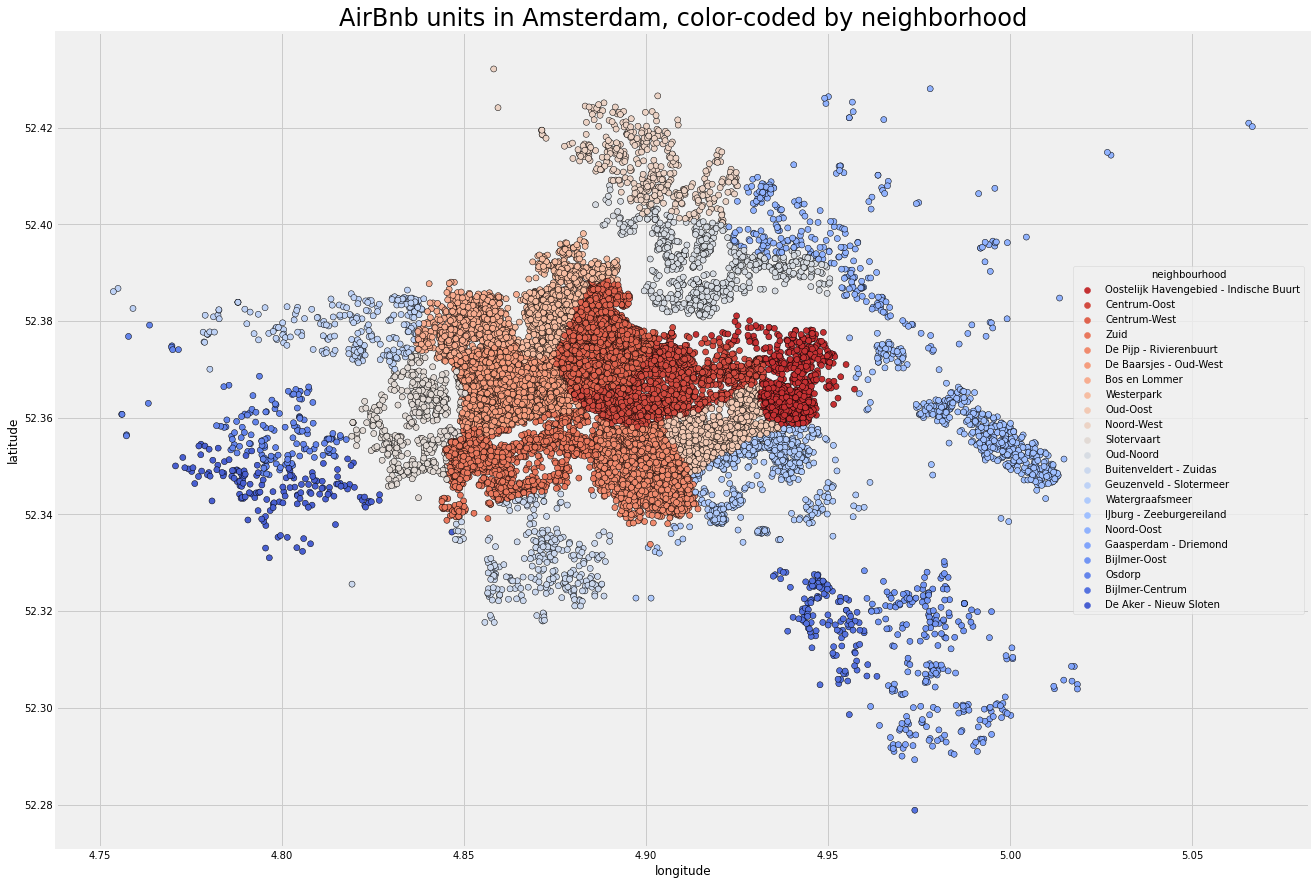

In [14]:
title = 'AirBnb units in Amsterdam, color-coded by neighborhood'
plt.figure(figsize=(20,15))
#sns.set_palette("Paired_r")
sns.scatterplot(master_df_amsterdam_unique.longitude, master_df_amsterdam_unique.latitude, hue = master_df_amsterdam_unique.neighbourhood, palette='coolwarm_r', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/airbnb_amsterdam_map.png')
plt.show()

## Add review data through a join

In [50]:
df_reviews = pd.concat([amsterdam_raw_df_11_4_2021,raw_df_amsterdam],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_ = df_regression_[df_regression_['accommodates'] <=4]

## Regression

In [51]:
#df_reviews_.columns

In [52]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [53]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  -376.1024104719607
Coefficients:  [ 28.06577534  41.21230429  -5.43696825   0.73195317   9.7826594
  28.13140559  20.99080047  76.23619391 -55.09720144]
LinearRegression()


In [54]:
y_pred2 = regr.predict(X_)

In [55]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')


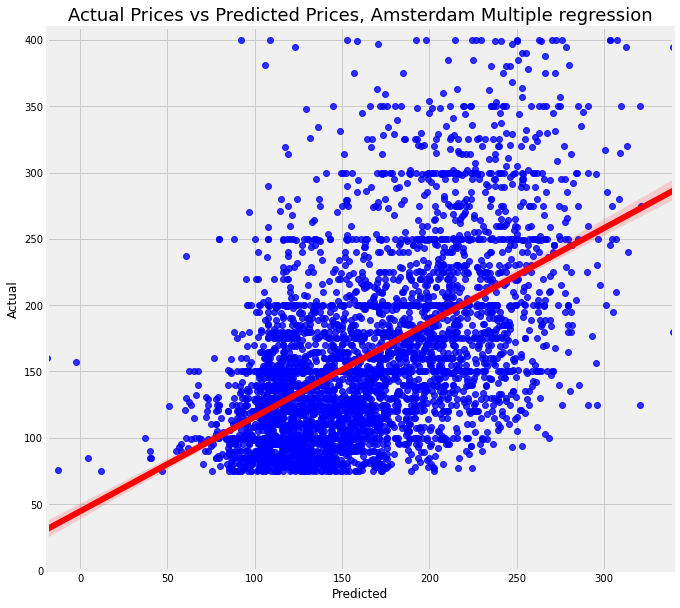

In [56]:
x = df_result['Predicted']
y = df_result['Actual']
fig = plt.figure(figsize=(10,10))
plt.title('Actual Prices vs Predicted Prices, Amsterdam Multiple regression', fontsize=18)
plt.xlabel('Predicted €')
plt.ylabel('Actual €')
plt.ylim([0,410])
ax = sns.regplot(x,y, data=df_result,  scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax.figure.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/amsterdam/airbnb_amsterdam_multiple_regression.png')



In [57]:
df_result.shape

(4039, 3)

## The most mispriced

In [62]:
amsterdam_mispriced = df_result.sort_values(by=['Diff'], ascending=False)
amsterdam_mispriced['%'] = amsterdam_mispriced['Actual']/ amsterdam_mispriced['Predicted'] *100
amsterdam_mispriced_perc = amsterdam_mispriced.sort_values(by=['%'], ascending=False)
amsterdam_mispriced.head()

,Actual,Predicted,Diff,%
556,125,320.693629,195.693629,38.978012
5297,125,296.212540,171.212540,42.199429
1948,100,268.600382,168.600382,37.230029
3582,125,290.568890,165.568890,43.019058
4507,103,266.149030,163.149030,38.700122


In [64]:

amsterdam_mispriced_1 = raw_df_amsterdam.loc[raw_df_amsterdam.index==3648]
amsterdam_mispriced_2 = raw_df_amsterdam.loc[raw_df_amsterdam.index==1478]
amsterdam_mispriced_3 = raw_df_amsterdam.loc[raw_df_amsterdam.index==4289]
amsterdam_mispriced_4 = raw_df_amsterdam.loc[raw_df_amsterdam.index==2121]
amsterdam_mispriced_5 = raw_df_amsterdam.loc[raw_df_amsterdam.index==4514]

In [63]:
amsterdam_mispriced_perc.head()

,Actual,Predicted,Diff,%
1297,85,4.353627,-80.646373,1952.394874
952,75,11.721797,-63.278203,639.833654
2397,400,92.217952,-307.782048,433.755025
3250,237,60.865577,-176.134423,389.382655
2779,400,108.781362,-291.218638,367.710050


In [65]:

amsterdam_mispriced_perc_1 = raw_df_amsterdam.loc[raw_df_amsterdam.index==1297]
amsterdam_mispriced_perc_2 = raw_df_amsterdam.loc[raw_df_amsterdam.index==952]
amsterdam_mispriced_perc_3 = raw_df_amsterdam.loc[raw_df_amsterdam.index==2397]
amsterdam_mispriced_perc_4 = raw_df_amsterdam.loc[raw_df_amsterdam.index==3250]
amsterdam_mispriced_perc_5 = raw_df_amsterdam.loc[raw_df_amsterdam.index==2779]

In [66]:
amsterdam_mispriced_1['listing_url']


3648    https://www.airbnb.com/rooms/34850332
Name: listing_url, dtype: object

In [67]:
amsterdam_mispriced_2['listing_url']

1478    https://www.airbnb.com/rooms/12596322
Name: listing_url, dtype: object

In [68]:
amsterdam_mispriced_3['listing_url']

4289    https://www.airbnb.com/rooms/42289865
Name: listing_url, dtype: object

In [69]:
amsterdam_mispriced_4['listing_url']

2121    https://www.airbnb.com/rooms/18233200
Name: listing_url, dtype: object

In [70]:
amsterdam_mispriced_5['listing_url']

4514    https://www.airbnb.com/rooms/44455238
Name: listing_url, dtype: object

In [72]:
amsterdam_mispriced_perc_1['listing_url']

1297    https://www.airbnb.com/rooms/10145992
Name: listing_url, dtype: object

In [73]:
amsterdam_mispriced_perc_2['listing_url']

952    https://www.airbnb.com/rooms/6535641
Name: listing_url, dtype: object

In [74]:
amsterdam_mispriced_perc_3['listing_url']

2397    https://www.airbnb.com/rooms/20757739
Name: listing_url, dtype: object

In [75]:
amsterdam_mispriced_perc_4['listing_url']

3250    https://www.airbnb.com/rooms/30166652
Name: listing_url, dtype: object

In [76]:
amsterdam_mispriced_perc_5['listing_url']

2779    https://www.airbnb.com/rooms/24571176
Name: listing_url, dtype: object

## The highest value

In [35]:
amsterdam_high_value = df_result.sort_values(by=['Predicted'], ascending=False)
amsterdam_high_value.head()

,Actual,Predicted,Diff
1478,299,608.810032,309.810032
4289,319,558.771782,239.771782
3601,330,549.657807,219.657807
2121,300,527.946024,227.946024
3648,160,512.041692,352.041692


In [36]:
amsterdam_highest_value_1 = raw_df_amsterdam.loc[raw_df_amsterdam.index==1478]
amsterdam_highest_value_2 = raw_df_amsterdam.loc[raw_df_amsterdam.index==4289]
amsterdam_highest_value_3 = raw_df_amsterdam.loc[raw_df_amsterdam.index==3601]
amsterdam_highest_value_4 = raw_df_amsterdam.loc[raw_df_amsterdam.index==2121]
amsterdam_highest_value_5 = raw_df_amsterdam.loc[raw_df_amsterdam.index==3648]

In [37]:
amsterdam_highest_value_1['listing_url']

1478    https://www.airbnb.com/rooms/12596322
Name: listing_url, dtype: object

In [38]:
amsterdam_highest_value_2['listing_url']

4289    https://www.airbnb.com/rooms/42289865
Name: listing_url, dtype: object

In [39]:
amsterdam_highest_value_3['listing_url']

3601    https://www.airbnb.com/rooms/34110514
Name: listing_url, dtype: object

In [40]:
amsterdam_highest_value_4['listing_url']

2121    https://www.airbnb.com/rooms/18233200
Name: listing_url, dtype: object

In [41]:
amsterdam_highest_value_5['listing_url']

3648    https://www.airbnb.com/rooms/34850332
Name: listing_url, dtype: object